In [0]:
#from google.colab import files
#uploaded = files.upload() 
#Please select file location

#**Data** **Preprocessing**

In [0]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.svm import SVC
import sklearn.metrics as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [0]:
#change the dataset location
df = pd.read_csv('bank-full.csv')
df.shape

(45211, 17)

In [0]:
#viewing data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
#data info
df.info()
#No null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [0]:
#Removing non-relevant variables
df1=df.drop(columns=['day','month','contact','poutcome'],axis=1)
df1

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,-1,0,no


In [0]:
#Replacing all the binary variables to 0 and 1
df1.y.replace(('yes', 'no'), (1, 0), inplace=True)
df1.default.replace(('yes', 'no'), (1, 0), inplace=True)
df1.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df1.loan.replace(('yes', 'no'), (1, 0), inplace=True)
df1

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,977,3,-1,0,1
45207,71,retired,divorced,primary,0,1729,0,0,456,2,-1,0,1
45208,72,retired,married,secondary,0,5715,0,0,1127,5,184,3,1
45209,57,blue-collar,married,secondary,0,668,0,0,508,4,-1,0,0


In [0]:
#creating Dummies for categorical variables
df2 = pd.get_dummies(df1)
df2.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,47,0,1506,1,0,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [0]:
#Removing extra dummy variables & checking descriptive stats
df3=df2.drop(columns=['job_unknown','marital_divorced','education_unknown'],axis=1)
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


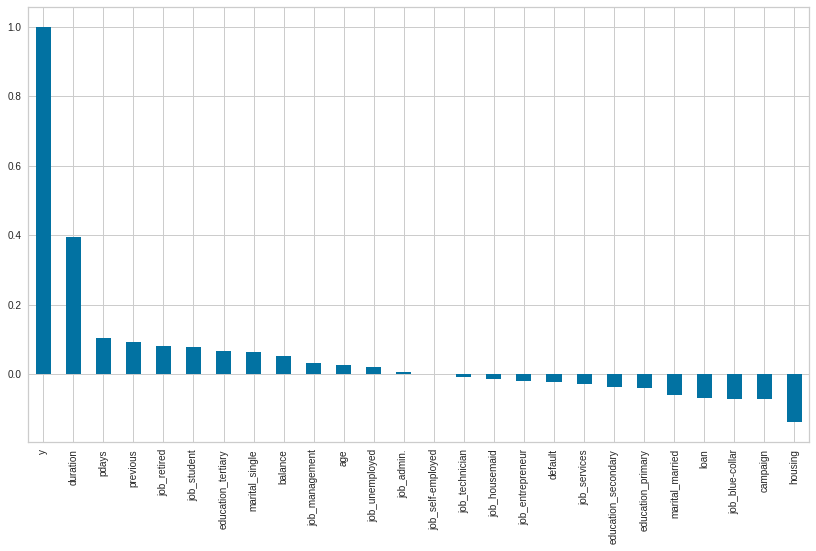

In [0]:
#Correlation plot
plt.figure(figsize=(14,8))
df3.corr()['y'].sort_values(ascending = False).plot(kind='bar')

In [0]:
#Creating binary classification target variable
df_target=df3[['y']].values
df_features=df3.drop(columns=['y'],axis=1).values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 0)

In [0]:
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

#Run SVM


In [0]:
#Linear SVM
print('Linear Model',end='\n')
lsvclassifier = SVC(kernel='linear')
lsvclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = lsvclassifier, X = x1_train, y = y1_train, cv = 5)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_linear*100,end='\n')
print('Standard deviation of Accuracies',std_svm_linear*100,end='\n')

#Predict SVM
y_predl = lsvclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

Linear Model


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

After 5 fold cross validation:
Mean of Accuracies:  88.32748772732253
Standard deviation of Accuracies 0.006008093966137762
Test Output:
Confusion Matrix:
[[11969     0]
 [ 1595     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564

Accuracy:  0.8824093187850192


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#Polynomial SVM
print('Polynomial Model',end='\n')
psvclassifier = SVC(kernel='poly')
psvclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = psvclassifier, X = x1_train, y = y1_train, cv = 5)
mean_svm_poly=accuracies.mean()
std_svm_poly=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_poly*100,end='\n')
print('Standard deviation of Accuracies',std_svm_poly*100,end='\n')

#Predict SVM
y_predp = psvclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predp))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predp))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predp, normalize=True, sample_weight=None))

Polynomial Model


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

After 5 fold cross validation:
Mean of Accuracies:  88.84570011359732
Standard deviation of Accuracies 0.14163730263511812
Test Output:
Confusion Matrix:
[[11823   146]
 [ 1379   216]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.60      0.14      0.22      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.56      0.58     13564
weighted avg       0.86      0.89      0.85     13564

Accuracy:  0.8875700383367738


In [0]:
#RBF SVM
print('RBF Model',end='\n')
rsvclassifier = SVC(kernel='rbf')
rsvclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = rsvclassifier, X = x1_train, y = y1_train, cv = 5)
mean_svm_rbf=accuracies.mean()
std_svm_rbf=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_rbf*100,end='\n')
print('Standard deviation of Accuracies',std_svm_rbf*100,end='\n')

#Predict SVM
y_predr = rsvclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predr))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predr))
print('Accuracy: ',sk.accuracy_score(y1_test, y_predr, normalize=True, sample_weight=None))

After 5 fold cross validation:
Mean of Accuracies:  89.17749310640829
Standard deviation of Accuracies 0.2598433648800193
Test Output:
Confusion Matrix:
[[11819   150]
 [ 1371   224]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.60      0.14      0.23      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.56      0.58     13564
weighted avg       0.86      0.89      0.86     13564

Accuracy:  0.887864936596874
RBF Model


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

After 5 fold cross validation:
Mean of Accuracies:  89.17749310640829
Standard deviation of Accuracies 0.2598433648800193
Test Output:
Confusion Matrix:
[[11819   150]
 [ 1371   224]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.60      0.14      0.23      1595

    accuracy                           0.89     13564
   macro avg       0.75      0.56      0.58     13564
weighted avg       0.86      0.89      0.86     13564

Accuracy:  0.887864936596874


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


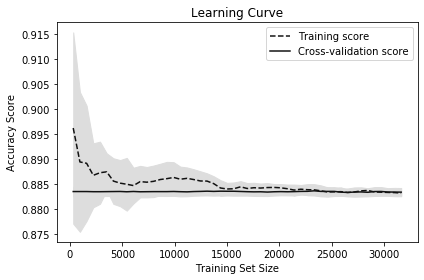

In [0]:
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(rsvclassifier, 
                                                        df_features, 
                                                        df_target,
                                                        # Number of folds in cross-validation
                                                        cv=cv,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


#Decision Trees


In [0]:
#Entropy Model
eclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
eclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = eclassifier, X = x1_train, y = y1_train, cv = 5)
mean_dt_e=accuracies.mean()
std_dt_e=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_dt_e*100,end='\n')
print('Standard deviation of Accuracies',std_dt_e*100,end='\n')

#predict y
y_pred = eclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test, y_pred))
print('Classification Report:')
print(sk.classification_report(y1_test, y_pred))
print('Accuracy: ',sk.accuracy_score(y1_test,y_pred))

After 5 fold cross validation:
Mean of Accuracies:  85.69850910712917
Standard deviation of Accuracies 0.4805516485223703
Test Output:
Confusion Matrix:
[[10922  1047]
 [  947   648]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     11969
           1       0.38      0.41      0.39      1595

    accuracy                           0.85     13564
   macro avg       0.65      0.66      0.66     13564
weighted avg       0.86      0.85      0.85     13564

Accuracy:  0.8529932173400177


In [0]:
#Gini Model
gclassifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
gclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = gclassifier, X = x1_train, y = y1_train, cv = 5)
mean_dt_g=accuracies.mean()
std_dt_g=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_dt_g*100,end='\n')
print('Standard deviation of Accuracies',std_dt_g*100,end='\n')

#predict y
y_pred = gclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test, y_pred))
print('Classification Report:')
print(sk.classification_report(y1_test, y_pred))
print('Accuracy: ',sk.accuracy_score(y1_test,y_pred))

After 5 fold cross validation:
Mean of Accuracies:  85.19923809181489
Standard deviation of Accuracies 0.28308724770396143
Test Output:
Confusion Matrix:
[[10896  1073]
 [  942   653]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     11969
           1       0.38      0.41      0.39      1595

    accuracy                           0.85     13564
   macro avg       0.65      0.66      0.65     13564
weighted avg       0.86      0.85      0.85     13564

Accuracy:  0.8514450014744913


In [0]:
#Pruning the better tree - Entropy Tree
parameters = [{'criterion': ['entropy'],'min_samples_leaf':[5,10,20,50,100],'max_depth':[5,10,20,50,100]}] 
grid_search = GridSearchCV(estimator = eclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x1_train, y1_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Accuracy: ',best_accuracy,end='\n')
print('Best Parameters: ',best_parameters,end='\n')

Accuracy:  0.8959776853743637
Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100}


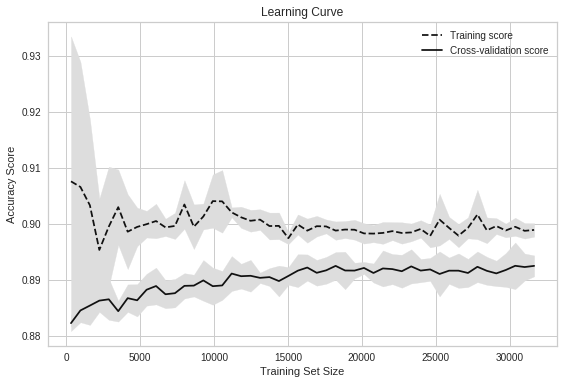

In [0]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(grid_search, 
                                                        df_features, 
                                                        df_target,
                                                        # Number of folds in cross-validation
                                                        cv=cv,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


#Boosting

In [0]:
# Boosting via Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
classifiergb = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
classifiergb.fit(x1_train, y1_train)

# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifiergb, X = x1_train, y = y1_train, cv = 10,n_jobs=-1)
mean_boosting=accuracies.mean()
std_boosting=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_boosting*100,end='\n')
print('Standard deviation of Accuracies',std_boosting*100,end='\n')

# Predicting the Test set results
y_predgb = classifiergb.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test, y_predgb))
print('Classification Report:')
print(sk.classification_report(y1_test, y_predgb))
print('Accuracy: ',sk.accuracy_score(y1_test,y_predgb))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After 5 fold cross validation:
Mean of Accuracies:  88.32748855109716
Standard deviation of Accuracies 0.014645713081277767
Test Output:
Confusion Matrix:
[[11969     0]
 [ 1595     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564

Accuracy:  0.8824093187850192


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#playing around with the pruning to get the best boosting tree
# Applying Grid Search to find the best model and the best parameters
from sklearn.ensemble import AdaBoostClassifier
classifier_AdaBoost = AdaBoostClassifier(random_state=1)
classifier_AdaBoost.fit(x1_train, y1_train)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [50,100,200,300,500,1000,1500]}] 
grid_search = GridSearchCV(estimator = classifier_AdaBoost,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x1_train, y1_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Accuracy: ',best_accuracy,end='\n')
print('Best Parameters: ',best_parameters,end='\n')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.8952824428853032
Best Parameters:  {'n_estimators': 1500}


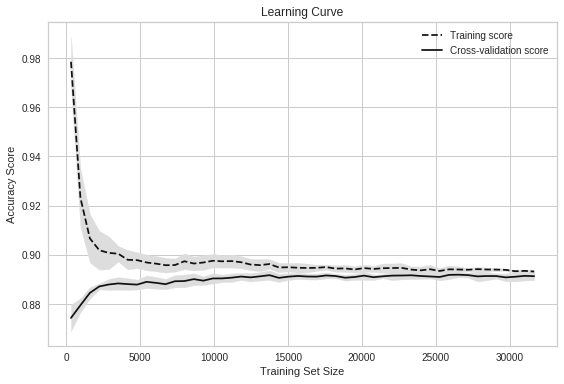

In [0]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(classifier_AdaBoost, 
                                                        df_features, 
                                                        df_target,
                                                        # Number of folds in cross-validation
                                                        cv=cv,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()
